# 3rd problem

## 1

Acceptance ratio:
0.958
Estimate of pi
3.144


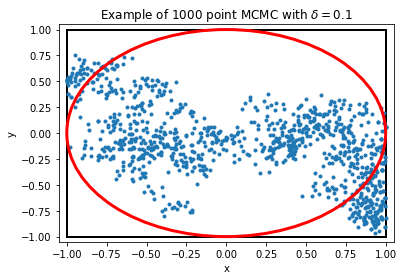

Acceptance ratio:
0.94575
Estimate of pi
3.132


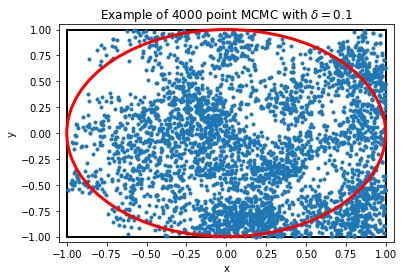

Acceptance ratio:
0.9542
Estimate of pi
3.237


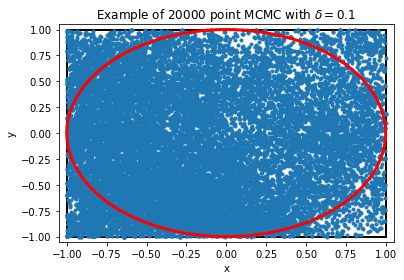

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

N = [1e3, 4e3, 20e3]

stepsize = 0.1

for n in N:
    n = int(n)
    
    S = np.zeros(n)
    xx = np.zeros(n)
    yy = np.zeros(n)    
    rejected = 0
    x, y = 0, 0
    
    for i in range(n):        
        dx = np.random.uniform(-stepsize,stepsize)
        dy = np.random.uniform(-stepsize,stepsize)
        x = x + dx
        y = y + dy
        
        if (x**2 + y**2) < 1:
            S[i] = 4
        if abs(x) > 1 or abs(y) > 1:
            x = x - dx
            y = y - dy
            rejected += 1
        xx[i] = x
        yy[i] = y
            
    print("Acceptance ratio:")
    print(1-rejected/n)
    print("Estimate of pi")
    print(np.mean(S))
        
    plt.figure()
    ax = plt.gca()
    circle = plt.Circle((0,0), 1, color="red", fill=False, zorder=5, lw=3)
    
    plt.plot(xx,yy, '.')
    plt.title("Example of " + str(n) + " point MCMC with " + r'$\delta = $' + str(stepsize))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([-1.05, 1.05])
    plt.ylim([-1.05, 1.05])
    
    ax.add_artist(circle)
    ax.add_patch(Rectangle((-1,-1), 2, 2, lw=2, color="black", fill=False))
    plt.show()
    plt.close("all")

In the plots above we can observe that 1000 or 4000 points are not enough to sample the square uniformly.

## 2

Now we try using a different stepsize $\delta$ that rejects about the half of the points.

Acceptance ratio:
0.507
Estimate of pi:
3.128


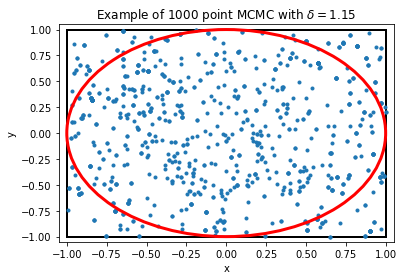

Acceptance ratio:
0.5215000000000001
Estimate of pi:
3.28


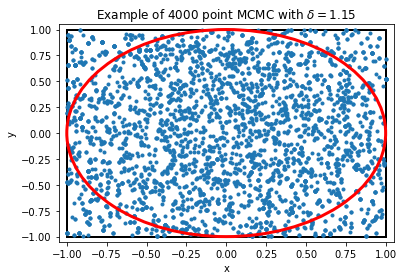

Acceptance ratio:
0.50795
Estimate of pi:
3.1246


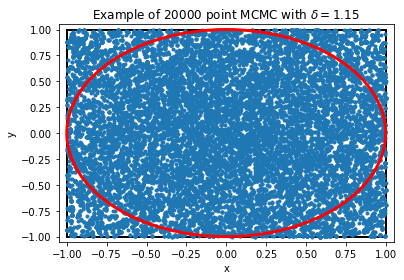

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

N = [1e3, 4e3, 20e3]

stepsize = 1.15

for n in N:
    n = int(n)
    
    S = np.zeros(n)
    xx = np.zeros(n)
    yy = np.zeros(n)    
    rejected = 0
    x, y = 0, 0
    
    for i in range(n):        
        dx = np.random.uniform(-stepsize,stepsize)
        dy = np.random.uniform(-stepsize,stepsize)
        x = x + dx
        y = y + dy
        
        if abs(x) > 1 or abs(y) > 1:
            x = x - dx
            y = y - dy
            rejected += 1
        if (x**2 + y**2) < 1:
            S[i] = 4
        xx[i] = x
        yy[i] = y
        
    print("Acceptance ratio:")
    print(1-rejected/n)
    print("Estimate of pi:")
    print(np.mean(S))
        
    plt.figure()
    ax = plt.gca()
    circle = plt.Circle((0,0), 1, color="red", fill=False, zorder=5, lw=3)
    
    plt.plot(xx,yy, '.')
    plt.title("Example of " + str(n) + " point MCMC with " + r'$\delta = $' + str(stepsize))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([-1.05, 1.05])
    plt.ylim([-1.05, 1.05])
    
    ax.add_artist(circle)
    ax.add_patch(Rectangle((-1,-1), 2, 2, lw=2, color="black", fill=False))
    plt.show()
    plt.close("all")

Now the square seems to be sampled uniformly even with 1000 points.

## 3

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

N = [1e3, 4e3, 20e3]

stepsize = 1

for n in N:
    n = int(n)
    
    S = np.zeros(n)
    xx = np.zeros(n)
    yy = np.zeros(n)    
    rejected = 0
    x, y = 0, 0
    
    for i in range(n):        
        dx = np.random.uniform(-stepsize,stepsize)
        dy = np.random.uniform(-stepsize,stepsize)
        x = x + dx
        y = y + dy
        
        if abs(x) > 1 or abs(y) > 1:
            x = x - dx
            y = y - dy
            rejected += 1
        if (x**2 + y**2) < 1:
            S[i] = 4
        xx[i] = x
        yy[i] = y
    
    print("n =", n)
    print("Estimate of pi:")
    print(np.mean(S))
    print("Numerical error of estimator:")
    print(np.sqrt(np.var(S) / n))
    print("Theoretically predicted error of estimator:")
    print(np.sqrt(1 / (n - 1) * np.sum(S**2- (np.mean(S))**2) / n))
    print("Super predicted error of estimator:")
    print(np.sqrt(np.pi * (4 - np.pi) / n)) 
    print()


n = 1000
Estimate of pi:
3.272
Numerical error of estimator:
0.0488059012825
Theoretically predicted error of estimator:
0.0488303225506
Super predicted error of estimator:
0.0519303977769

n = 4000
Estimate of pi:
3.16
Numerical error of estimator:
0.0257604347789
Theoretically predicted error of estimator:
0.0257636554372
Super predicted error of estimator:
0.0259651988885

n = 20000
Estimate of pi:
3.1542
Numerical error of estimator:
0.0115495072622
Theoretically predicted error of estimator:
0.0115497960107
Super predicted error of estimator:
0.0116119899528

